In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.metrics import roc_curve, auc,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import dataframe_image as dfi


In [20]:
df = pd.read_csv("../Dataset/slider_features.csv").iloc[:,1:]
df

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,-0.026870,0.028764,-1.398502e-06,0.005328,0.047631,0.020020,0.069336,1014.801047,1372.581294,2336.352539,3214.092862,0.005268,0.000342,0.007224,0.013499,0.007090,0.006609,0.029762,0
1,-0.024040,0.028493,-4.029802e-06,0.005365,0.041871,0.019043,0.087402,720.012314,985.649834,1173.559570,2035.462247,0.005330,0.000147,0.001054,0.014137,0.007547,0.006682,0.024763,0
2,-0.025671,0.027518,5.779765e-07,0.005878,0.045000,0.019531,0.065430,919.668972,1086.078007,1991.821289,2356.461853,0.005845,0.000183,0.002889,0.015400,0.007993,0.008053,0.028967,0
3,-0.022808,0.022871,-2.906805e-07,0.005626,0.055353,0.019531,0.078125,1165.522377,1394.776445,2540.917969,3284.712775,0.005581,0.000322,0.010397,0.014580,0.008242,0.007418,0.029873,0
4,-0.023353,0.023600,-5.806836e-07,0.005836,0.040303,0.017578,0.058594,780.914492,938.608348,1582.690430,1914.206832,0.005797,0.000131,0.004567,0.015175,0.008566,0.007925,0.029198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,-0.041769,0.043208,-1.804644e-06,0.005898,0.057817,0.025879,0.211426,925.870269,1282.609473,1679.589844,2736.240608,0.005661,0.000305,0.001930,0.015768,0.007578,0.007980,0.041882,1
4090,-0.045630,0.045665,-1.505834e-06,0.005622,0.078650,0.037109,0.203125,1067.166253,1518.960340,1776.489258,3184.366050,0.005318,0.000480,0.013171,0.015188,0.007137,0.007070,0.039212,1
4091,-0.041430,0.044381,-1.803019e-06,0.005321,0.079525,0.040039,0.207520,1127.266154,1536.705630,1754.956055,3283.638613,0.005045,0.000473,0.005426,0.014260,0.006204,0.006365,0.036640,1
4092,-0.035230,0.036468,-1.439296e-06,0.004921,0.141861,0.031250,0.228027,1051.962289,2204.574741,2002.587891,4530.765797,0.004516,0.001577,0.020881,0.013735,0.003698,0.004846,0.031990,1


In [21]:
df.corr()

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
y_min,1.000000,-0.887020,-0.004147,-0.700234,-0.010928,-0.015951,-0.104277,-0.000263,-0.147398,0.016978,-0.210379,-0.659545,0.003760,-0.045358,-0.735555,0.029364,-0.725311,-0.682629,-0.412523
y_max,-0.887020,1.000000,-0.006842,0.655944,0.002392,0.033549,0.078511,0.000493,0.137376,-0.011179,0.195948,0.613668,-0.004645,0.036580,0.697064,-0.060702,0.685907,0.648226,0.379127
y_mean,-0.004147,-0.006842,1.000000,-0.000311,-0.006590,-0.003714,-0.030934,0.015114,0.007450,0.017478,0.010017,-0.001134,-0.004645,-0.023152,-0.005554,0.033518,0.001330,0.009981,-0.007646
y_std,-0.700234,0.655944,-0.000311,1.000000,-0.228191,-0.178430,-0.276900,-0.148060,0.002077,-0.123920,0.070862,0.996896,-0.232041,-0.091812,0.966036,0.226767,0.986091,0.951240,0.451597
zcr_mean,-0.010928,0.002392,-0.006590,-0.228191,1.000000,0.775969,0.686243,0.728198,0.918879,0.673808,0.851462,-0.257408,0.956261,0.639965,-0.041440,-0.151093,-0.237359,-0.194500,0.329398
zcr_min,-0.015951,0.033549,-0.003714,-0.178430,0.775969,1.000000,0.377082,0.833031,0.721997,0.766495,0.654682,-0.203461,0.775298,0.526665,-0.027409,-0.007675,-0.170109,-0.135152,0.196231
zcr_max,-0.104277,0.078511,-0.030934,-0.276900,0.686243,0.377082,1.000000,0.324767,0.597910,0.268153,0.588870,-0.309861,0.627414,0.436300,-0.154647,-0.260784,-0.282895,-0.238779,0.182205
spec_cent_min,-0.000263,0.000493,0.015114,-0.148060,0.728198,0.833031,0.324767,1.000000,0.753998,0.960061,0.721641,-0.170882,0.735145,0.451127,-0.010677,0.059178,-0.142305,-0.090952,0.152008
spec_cent_mean,-0.147398,0.137376,0.007450,0.002077,0.918879,0.721997,0.597910,0.753998,1.000000,0.724618,0.979604,-0.026822,0.895002,0.620925,0.164573,-0.091207,-0.026429,0.063651,0.459535
spec_roll_min,0.016978,-0.011179,0.017478,-0.123920,0.673808,0.766495,0.268153,0.960061,0.724618,1.000000,0.716249,-0.141131,0.708988,0.440496,0.004208,0.099304,-0.121620,-0.081257,0.117988


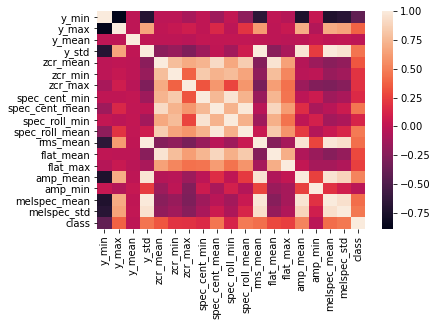

In [22]:
heat_map = sns.heatmap(df.corr())
fig = heat_map.get_figure()
fig.savefig("../img/slider_model/correlation_heatmap.PNG",bbox_inches="tight")

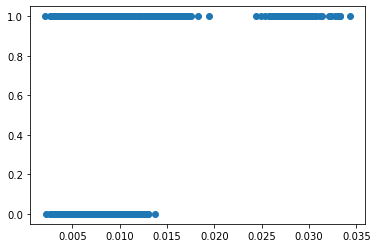

In [23]:
plt.scatter(df["melspec_mean"],df["class"])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

In [25]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_rf = Pipeline([('scalar2',StandardScaler()),
                        ('rf_classifier',RandomForestClassifier(n_estimators=int((len(df.columns)**0.5//1)+2), criterion= 'entropy',random_state=0))])

pipeline_dt = Pipeline([('scalar3',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier(criterion="entropy",random_state=0))])

pipeline_GaussianNB = Pipeline([('scalar4',StandardScaler()),
                        ('gaussianNB_classifier',GaussianNB())])

pipeline_SVM = Pipeline([('scalar5',StandardScaler()),
                        ('svm_classifier',SVC(kernel="linear",C=1))])


In [26]:
pipelines = [pipeline_lr,pipeline_rf,pipeline_dt,pipeline_GaussianNB,pipeline_SVM]

pipe_dict = {0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'GaussianNB',4:'Support Vector Machine'}

In [27]:
import warnings
warnings.filterwarnings('ignore')

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [28]:
best_f1=0.0
best_classifier_indx = 0
best_pipeline=""
evaluation_metrics = ["f1","accuracy","precision","recall"]

In [29]:
result = {}
list_of_results = []

In [30]:
for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    print(f"{pipe_dict[i]}")
    result.update()
    for metric in evaluation_metrics:
        scores = np.round(cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring=metric),2)
        print(f"{pipe_dict[i]} {metric}: {scores}, mean: {np.mean(scores)}")
        result.update({"model":pipe_dict[i],
                       metric+"scores":scores,
                       metric+"_mean":np.mean(scores)})
        
    
    score = cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring="f1")
    print(f"mean f1 = {np.mean(score)}, best f1: {best_f1}")
 

    if np.mean(score)>best_f1:

        best_f1 =  np.mean(score)
        best_pipeline=model
        best_classifier_idnx = i
    list_of_results.append(result)
    result = {}

print(f"Classifier with the best accuracy:{pipe_dict[best_classifier_idnx]}")

Logistic Regression
Logistic Regression f1: [0.99 0.97 0.77 0.56 0.17], mean: 0.692
Logistic Regression accuracy: [0.99 0.99 0.92 0.85 0.77], mean: 0.9039999999999999
Logistic Regression precision: [1.   0.98 0.95 0.81 0.37], mean: 0.8219999999999998
Logistic Regression recall: [0.97 0.97 0.65 0.43 0.11], mean: 0.626
mean f1 = 0.6911204251116566, best f1: 0.0
Random Forest
Random Forest f1: [0.98 0.95 0.8  0.63 0.23], mean: 0.718
Random Forest accuracy: [0.99 0.98 0.93 0.86 0.61], mean: 0.874
Random Forest precision: [0.98 0.93 0.97 0.77 0.2 ], mean: 0.77
Random Forest recall: [0.98 0.97 0.69 0.53 0.26], mean: 0.6859999999999999
mean f1 = 0.7181866880984513, best f1: 0.6911204251116566
Decision Tree
Decision Tree f1: [0.89 0.95 0.81 0.65 0.26], mean: 0.712
Decision Tree accuracy: [0.95 0.98 0.92 0.84 0.54], mean: 0.8460000000000001
Decision Tree precision: [0.81 0.92 0.85 0.63 0.2 ], mean: 0.682
Decision Tree recall: [0.98 0.97 0.78 0.67 0.37], mean: 0.754
mean f1 = 0.7104052840710905,

In [31]:
evaluation_metrics_df = pd.DataFrame(list_of_results)
evaluation_metrics_df

,model,f1scores,f1_mean,accuracyscores,accuracy_mean,precisionscores,precision_mean,recallscores,recall_mean
0,Logistic Regression,"[0.99, 0.97, 0.77, 0.56, 0.17]",0.692,"[0.99, 0.99, 0.92, 0.85, 0.77]",0.904,"[1.0, 0.98, 0.95, 0.81, 0.37]",0.822,"[0.97, 0.97, 0.65, 0.43, 0.11]",0.626
1,Random Forest,"[0.98, 0.95, 0.8, 0.63, 0.23]",0.718,"[0.99, 0.98, 0.93, 0.86, 0.61]",0.874,"[0.98, 0.93, 0.97, 0.77, 0.2]",0.770,"[0.98, 0.97, 0.69, 0.53, 0.26]",0.686
2,Decision Tree,"[0.89, 0.95, 0.81, 0.65, 0.26]",0.712,"[0.95, 0.98, 0.92, 0.84, 0.54]",0.846,"[0.81, 0.92, 0.85, 0.63, 0.2]",0.682,"[0.98, 0.97, 0.78, 0.67, 0.37]",0.754
3,GaussianNB,"[0.91, 0.89, 0.55, 0.51, 0.34]",0.640,"[0.96, 0.95, 0.76, 0.83, 0.7]",0.840,"[0.85, 0.8, 0.47, 0.69, 0.33]",0.628,"[0.99, 0.99, 0.66, 0.4, 0.36]",0.680
4,Support Vector Machine,"[0.99, 0.98, 0.78, 0.51, 0.04]",0.660,"[0.99, 0.99, 0.92, 0.85, 0.78]",0.906,"[1.0, 1.0, 0.97, 0.95, 0.67]",0.918,"[0.97, 0.96, 0.65, 0.35, 0.02]",0.590


In [32]:
dfi.export(evaluation_metrics_df,"../img/slider_model/evaluation_df.PNG")

In [33]:
pred = pipeline_dt.predict(X_test)

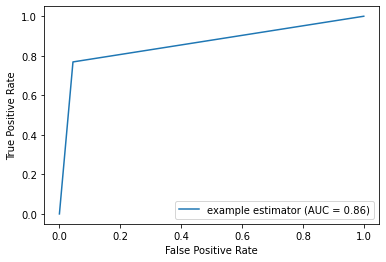

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
        estimator_name='example estimator')

display.plot()
plt.show()
display.figure_.savefig("../img/slider_model/roc_curve.PNG")

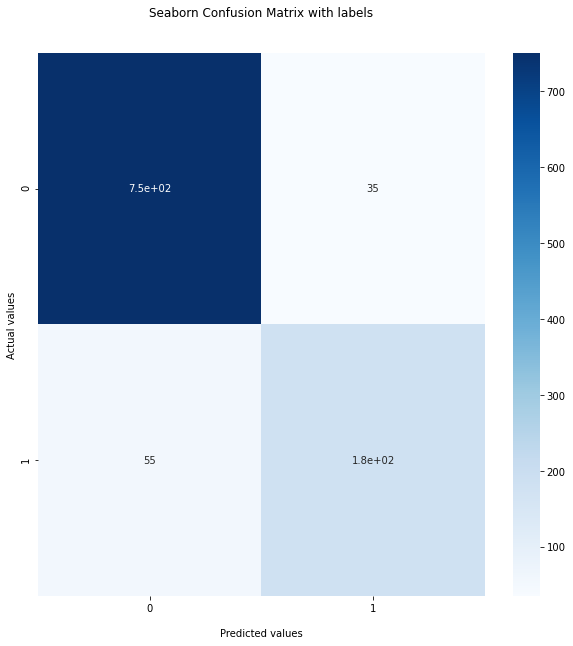

In [35]:

cm = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values');

## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()
fig.savefig("../img/slider_model/confusion_matrix.PNG", bbox_inches="tight")

